#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/data'

total 2197813
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root   4052564 Feb  2 12:48 data_2020_1_12.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root    530660 Feb 18 12:59 data_2020_ml.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,555 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='NanumBarunGothic') 

#3. Load Data

In [4]:
import pandas as pd

In [5]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020_1_12.csv"
data = pd.read_csv(file)

In [6]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


In [8]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
#101,서울(406.94) 105,기흥(387.19) 110,목천(329.91) 115,대전(271.94) 120,황간(222.38) 125,남구미(167.25) 130,동김천(192.00) 135,경주(68.26) 140,부산(0)
#Distance from Seoul : 0, 19.75, 77.03, 135, 184.56, 214.94, 239.69, 338.68, 406.94
# Distance from Seoul : 0, 20, 77, 135, 185, 240, 215, 339, 407
data['도착영업소코드'] = data['도착영업소코드'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [9]:
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,215,8806,3
152866,20201231,5,101,215,8733,3
152867,20201231,6,101,77,3173,3
152868,20201231,13,101,77,3866,3


In [10]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

In [11]:
data

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,215,8806,3
152866,20201231,5,101,215,8733,3
152867,20201231,6,101,77,3173,3
152868,20201231,13,101,77,3866,3


#4. Linear Regression by Tensorflow

In [12]:
import tensorflow as tf
import numpy as np

In [53]:
Selected_Date = '2020-01-10' #@param {type:"date"}
input_date = int(Selected_Date.replace('-',''))
print(input_date)

20200110


In [54]:
data_date = data[data['집계일자'] == input_date]

In [55]:
data_date

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
3570,20200110,9,101,20,778,4
3571,20200110,9,101,20,862,4
3572,20200110,9,101,20,739,4
3573,20200110,9,101,20,852,4
3574,20200110,9,101,20,874,4
...,...,...,...,...,...,...
8440,20200110,2,101,135,7556,4
8442,20200110,6,101,135,6902,4
8447,20200110,7,101,215,8207,4
8448,20200110,3,101,135,4560,4


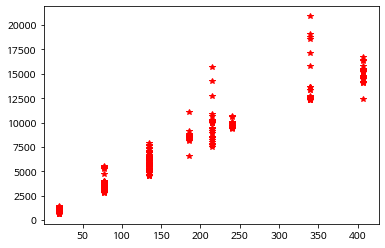

In [56]:
plt.plot(data_date['거리'], data_date['통행시간'], 'r*')

In [57]:
data_time = data_date.groupby(['집계일자','거리'])['통행시간'].mean()

In [58]:
data_time

집계일자      거리 
20200110  20       880.007353
          77      3545.876190
          135     5816.191781
          185     8557.842105
          215     9592.600000
          240     9795.133333
          339    14371.681818
          407    15032.960000
Name: 통행시간, dtype: float64

In [59]:
data_out = data_time.reset_index()

In [60]:
data_out

,집계일자,거리,통행시간
0,20200110,20,880.007353
1,20200110,77,3545.876190
2,20200110,135,5816.191781
3,20200110,185,8557.842105
4,20200110,215,9592.600000
5,20200110,240,9795.133333
6,20200110,339,14371.681818
7,20200110,407,15032.960000


In [62]:
# Dataframe to List
data_list = data_out.values.tolist()
data_list

[[20200110.0, 20.0, 880.0073529411765],
 [20200110.0, 77.0, 3545.8761904761905],
 [20200110.0, 135.0, 5816.191780821918],
 [20200110.0, 185.0, 8557.842105263158],
 [20200110.0, 215.0, 9592.6],
 [20200110.0, 240.0, 9795.133333333333],
 [20200110.0, 339.0, 14371.681818181818],
 [20200110.0, 407.0, 15032.96]]

In [63]:
x_train = [ int(r[1]) for r in data_list ]
y_train = [ int(r[2]/10) for r in data_list]

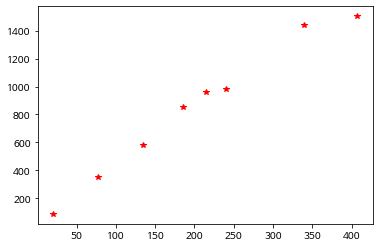

In [64]:
plt.plot(x_train, y_train, 'r*')

In [65]:
learning_rate = 1e-8
learning_epochs = 2000

In [66]:
# Stochastic gradient descent (SGD) Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
# Mean Square Error (MSE) loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

model.compile(loss=mse, optimizer=sgd)

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [68]:
#Train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
1/1 [==============================] - 0s 239ms/step - loss: 680829.5625
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 679334.7500
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 677843.2500
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 676355.0625
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 674870.1250
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 673388.5625
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 671910.2500
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 670435.1875
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 668963.3750
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 667494.8750
Epoch 11/2000
1/1 [==============================] - 0s 5ms/step - loss: 666029.6250
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss:

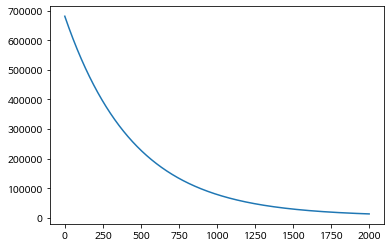

In [69]:
plt.plot(history.history['loss'])
plt.show()

In [72]:
data_out

,집계일자,거리,통행시간
0,20200110,20,880.007353
1,20200110,77,3545.876190
2,20200110,135,5816.191781
3,20200110,185,8557.842105
4,20200110,215,9592.600000
5,20200110,240,9795.133333
6,20200110,339,14371.681818
7,20200110,407,15032.960000


In [76]:
Distance = 407 #@param {type:"slider", min:0, max:500, step:1}
input_data = [Distance]
predicted_value = model.predict(input_data)

print('%3d km takes %5.1f seconds on %s' %(Distance, predicted_value[0][0]*10, Selected_Date))

407 km takes 15035.1 seconds on 2020-01-10
